In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

In [69]:
from flask import Flask, jsonify
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/secar/OneDrive/Documents/Bootcamp/Starter_Code/Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(engine, reflect=True)

# reflect the tables
base.prepare(engine, reflect=True)

C:\Users\secar\AppData\Local\Temp\ipykernel_31360\292855488.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)
C:\Users\secar\AppData\Local\Temp\ipykernel_31360\292855488.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [60]:
# View all of the classes that automap found
print(base.classes.keys())

['station', 'measurement']


In [61]:
# Save references to each table
station_table = base.classes.station
measurement_table = base.classes.measurement

In [62]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [63]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement_table.date)).scalar()
print(most_recent_date)

2017-08-23


In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = pd.to_datetime(most_recent_date) - pd.DateOffset(months=12)
# Calculate the date one year from the last date in data set.

# My note: Convert the most recent date to a datetime object
import datetime
most_recent_date = datetime.datetime.strptime(most_recent_date, '%Y-%m-%d').date()
one_year_from_most_recent = most_recent_date - datetime.timedelta(days=365)
print(one_year_from_most_recent)

2016-08-23


In [65]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement_table.date, measurement_table.prcp).all()

# Print the results
for result in results:
    print(result)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df_sorted = precip_data.sort_values(by='Date')

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

In [66]:
from datetime import datetime as dt
start_date = dt(2016, 8, 23)
most_recent_date = dt(2017, 8, 23)
df_sorted['Date'] = pd.to_datetime(df_sorted['Date'])

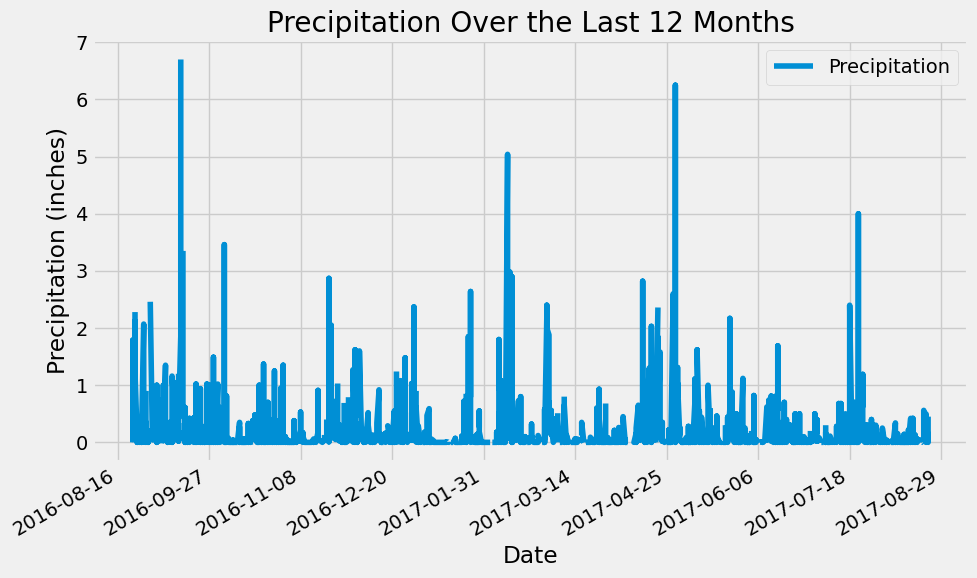

In [68]:
#filter to go between those 2 dates
filtered_df = df_sorted[(df_sorted['Date'] >= start_date) & (df_sorted['Date'] <= most_recent_date)]
#change 'Date'

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.xticks(rotation=45)

#extra date formatting
import matplotlib.dates as mdates
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# Set the major locator to show every 6 weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.legend()
plt.tight_layout()
plt.show()

#figure out how to fix the dates

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df_sorted['Precipitation'].describe()
print(summary_stats)

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
#my note: importing distinct to count unique stations
from sqlalchemy import distinct
total_stations = session.query(func.count(distinct(station_table.station))).scalar()
print(total_stations)

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Design a query to find the most active stations
most_active_stations = session.query(measurement_table.station, func.count(measurement_table.station))\
                              .group_by(measurement_table.station)\
                              .order_by(func.count(measurement_table.station).desc())\
                              .all()

# Print the stations and their counts in descending order
for station, count in most_active_stations:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Extract the most active station ID from the previous query
most_active_station_id = most_active_stations[0][0]

# Calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(measurement_table.tobs), 
                                  func.max(measurement_table.tobs), 
                                  func.avg(measurement_table.tobs))\
                            .filter(measurement_table.station == most_active_station_id)\
                            .all()

# Print the temperature statistics
print(temperature_stats[0][0], temperature_stats[0][1], temperature_stats[0][2])

54.0 85.0 71.66378066378067


In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#to get the correct date/time format 
#from datetime import datetime as dt

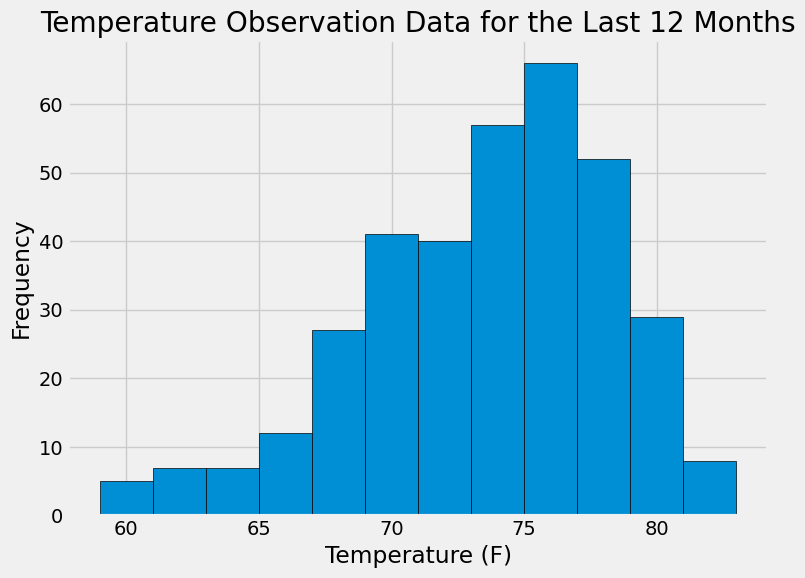

In [37]:
#start_date = dt(2016, 8, 23)
#most_recent_date = dt(2017, 8, 23)

start_date_str = start_date.strftime('%Y-%m-%d')
most_recent_date_str = most_recent_date.strftime('%Y-%m-%d')

results = session.query(measurement_table.tobs)\
                 .filter(measurement_table.station == most_active_station_id)\
                 .filter(measurement_table.date >= start_date)\
                 .filter(measurement_table.date <= most_recent_date)\
                 .all()

# Extract temperatures from the query results
temperatures = [result[0] for result in results]

# Plot the results as a histogram with bins=12
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, edgecolor='black')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data for the Last 12 Months')
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()